# Prepreg Curing

Prepreg is the most common type of material used in aerospace composites. It can be found in many other applications including automotive (Formula 1 and super cars) and recreational goods (bikes, kayaks, etc). It involves laying precut pieces of prepreg (fibre that is pre-impregnated with resin) material on a one-sided tool that is covered in a vacuum bag and cured in an autoclave or oven.  

In this lab session, students will create a carbon fiber/epoxy composite panel from prepreg material and cure it in a curing oven while recording temperature at various locations to investigate the variations in temperature and heat transfer within an oven, as well as the impact of thermocouple placement.  

Students may also benefit from reviewing the following pages to learn more about this process and analysis: <br>
https://compositeskn.org/KPC/A132 - Heat transfer <br>
https://compositeskn.org/KPC/A171 - Prepreg material <br>
https://compositeskn.org/KPC/A125 - Webinar on prepreg processing <br>

## Theory and Background

Temperature and airflow variations within an oven or autoclave can lead to different thermal histories of parts while they are curing. These variations can affect how a composite cures and, in turn how it performs in service. The figure below shows a plot of the intended cure cycle/air temperature in dashed blue, and (a hypothetical) part temperature in red. The maximum exotherm and lag are shown. Exotherm is the temperature difference between the (expected) cure cycle and the actual part temperature that is the result of the exothermic cure reaction. Lag is the difference between the (expected) cure cycle and the actual part temperature that is the result of the time it takes heat to transfer into a material.  <br>
<br>
<img src="ThermalHistory.png" alt="Thermal History" width="400">

The figure below shows the locations that thermocouples are installed during the curing process in the lab activity. Thermocouples are placed in these locations to measure part temperature as well as air temperature. <br> 
<br>
<img src="Oven.png" alt="Oven" width="400">

## Procedure

Please follow the lab manual provided by the instructor. This page is intended to supplement the provided material, not replace it. <br>

In the lab students will layup a prepreg panel, load it into the oven and install thermocouples to measure the part and air temperature in four locations: top left, top right, bottom left, bottom right. The panels will be cured according to the manufacturer's recommended cure cycle (MRCC) and the temperature data will be recorded and posted for analysis in the lab. Once students recieve the data, the lab manual asks students to analyize it by plotting the temperature vs time (including the MRCC curve) data and report the maximum exotherm temperature and maximum lag temperature, as well as answer other questions. <br> 

This code will help students perform the analysis, which involves the following steps:
1) Save the data as a CSV file and load it into the Jupyter notebook as a pandas dataframe
2) Insert a column of data to represent the MRCC if this is not included (not recorded during the lab)
3) Plot the time vs temperature curves for all thermocouples and MRCC
4) Identify and report the maximum exotherm temperature
5) Identify and report the maximum lag temperature

The code blocks below will help walk through these calcualtions. Note, they can also be done with Excel, Matlab, other software, or manually if you prefer.

#### 0. Import packages

This example uses pandas, numpy, and matplotlib. The first step is to import them. 

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Load data file

Ensure that your file is in the correct CSV format and saved in the working directory. Note, the data included here is just for demonstration purposes and should not be used for your analysis. 

In [2]:
# Load the data file (e.g., comma-delimited or tab-delimited)
df = pd.read_csv("PrepregCureData.txt", delimiter=",")  # Change delimiter as needed

# Convert the time column to minutes
df["Time(min)"] = df["Time(s)"] / 60

# Display the data
df

,Time(s),TL-P,TL-A,TR-P,TR-A,BL-P,BL-A,BR-P,BR-A,Time(min)
0,0.0,25.806396,21.724262,25.524088,22.034067,23.870878,21.520148,24.213653,21.413051,0.000000
1,0.5,25.801065,21.716542,25.531503,22.022560,23.862926,21.460054,24.223667,21.417877,0.008333
2,1.0,25.819659,21.723835,25.505248,22.007589,23.880019,21.477657,24.224682,21.407048,0.016667
3,1.5,25.794139,21.698693,25.495302,22.002348,23.885238,21.471988,24.197754,21.392374,0.025000
4,2.0,25.809971,21.752012,25.496501,21.943396,23.875664,21.431591,24.208038,21.370457,0.033333
...,...,...,...,...,...,...,...,...,...,...
153533,76766.5,25.410744,25.317717,25.407438,25.129749,25.004557,24.647382,25.022035,24.908188,1279.441667
153534,76767.0,25.414162,25.309801,25.419356,25.126555,25.010044,24.638222,25.018547,24.925014,1279.450000
153535,76767.5,25.417488,25.322100,25.402850,25.157749,25.010966,24.647650,25.018052,24.924046,1279.458333
153536,76768.0,25.420861,25.319807,25.384030,25.136563,25.027839,24.654133,25.024060,24.902655,1279.466667


#### 2. Create a column for MRCC

Include the ramp up, hold and ramp down. Create the data at an interval that is the same as the experimental data. Start at roughly the same temperature the thermocouple data starts at (~$20^oC$)


In [3]:
# Generate MRCC cycle
time_step = 0.5  # seconds
ramp1_rate = 3 / 60  # °C/sec (3 °C/min to °C/sec)
ramp1_start = 20  # Start at 20 °C
ramp1_end = 120  # Ramp to 120 °C

hold_time = 4 * 3600  # 4 hours in seconds
hold_temp = ramp1_end

ramp2_rate = -5 / 60  # °C/sec (-5 °C/min to °C/sec)
ramp2_start = ramp1_end
ramp2_end = 60

# Generate time and temperature for each phase
# Ramp 1: 3 °C/min to 120 °C
ramp1_time = np.arange(0, (ramp1_end - ramp1_start) / ramp1_rate, time_step)
ramp1_temp = ramp1_start + ramp1_rate * ramp1_time

# Hold at 120 °C for 4 hours
hold_time_steps = int(hold_time / time_step)
hold_time = np.arange(ramp1_time[-1] + time_step, ramp1_time[-1] + hold_time + time_step, time_step)
hold_temp = np.full_like(hold_time, hold_temp)

# Ramp 2: -5 °C/min to 60 °C
ramp2_time = np.arange(hold_time[-1] + time_step, 
                       hold_time[-1] + (ramp2_start - ramp2_end) / abs(ramp2_rate) + time_step, 
                       time_step)
ramp2_temp = ramp2_start + ramp2_rate * (ramp2_time - hold_time[-1])

# Combine all phases into one time and temperature array
time = np.concatenate((ramp1_time, hold_time, ramp2_time))
temperature = np.concatenate((ramp1_temp, hold_temp, ramp2_temp))

# Create MRCC DataFrame
MRCC = pd.DataFrame({'MRCC': temperature})

# Trim `df` to match MRCC's length
if 'df' in locals() or 'df' in globals():
    df = df.iloc[:len(MRCC)].reset_index(drop=True)  # Cut down df to the size of MRCC

# Add MRCC data to the existing `df`
df = pd.concat([df, MRCC], axis=1)

# Display the result
df


,Time(s),TL-P,TL-A,TR-P,TR-A,BL-P,BL-A,BR-P,BR-A,Time(min),MRCC
0,0.0,25.806396,21.724262,25.524088,22.034067,23.870878,21.520148,24.213653,21.413051,0.000000,20.000000
1,0.5,25.801065,21.716542,25.531503,22.022560,23.862926,21.460054,24.223667,21.417877,0.008333,20.025000
2,1.0,25.819659,21.723835,25.505248,22.007589,23.880019,21.477657,24.224682,21.407048,0.016667,20.050000
3,1.5,25.794139,21.698693,25.495302,22.002348,23.885238,21.471988,24.197754,21.392374,0.025000,20.075000
4,2.0,25.809971,21.752012,25.496501,21.943396,23.875664,21.431591,24.208038,21.370457,0.033333,20.100000
...,...,...,...,...,...,...,...,...,...,...,...
34235,17117.5,119.396106,118.506455,120.233519,118.898795,118.029842,117.132053,118.494287,117.862635,285.291667,60.166667
34236,17118.0,119.399486,118.489798,120.221043,118.906834,118.034243,117.154609,118.478656,117.862379,285.300000,60.125000
34237,17118.5,119.375200,118.476707,120.207472,118.898399,118.056951,117.142389,118.485528,117.869714,285.308333,60.083333
34238,17119.0,119.372939,118.475845,120.211273,118.913847,118.038040,117.155610,118.495964,117.864312,285.316667,60.041667


#### 3. Plot the data

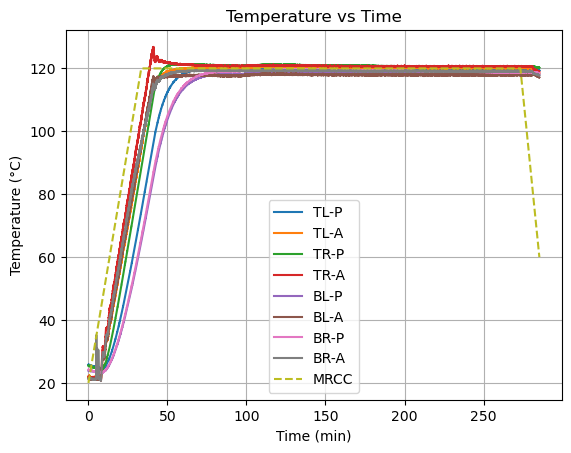

In [4]:
# Plot the full data set

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot each column against 'Time(s)' using matplotlib
ax.plot(df["Time(min)"], df["TL-P"], label="TL-P")
ax.plot(df["Time(min)"], df["TL-A"], label="TL-A")
ax.plot(df["Time(min)"], df["TR-P"], label="TR-P")
ax.plot(df["Time(min)"], df["TR-A"], label="TR-A")
ax.plot(df["Time(min)"], df["BL-P"], label="BL-P")
ax.plot(df["Time(min)"], df["BL-A"], label="BL-A")
ax.plot(df["Time(min)"], df["BR-P"], label="BR-P")
ax.plot(df["Time(min)"], df["BR-A"], label="BR-A")
ax.plot(df["Time(min)"], df["MRCC"], label="MRCC", linestyle="--")  # Dashed line for MRCC

# Add labels and title
ax.set_title("Temperature vs Time")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Temperature (°C)")
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()



It may be useful to zoom in the region of interest by adjusting the plot axes.

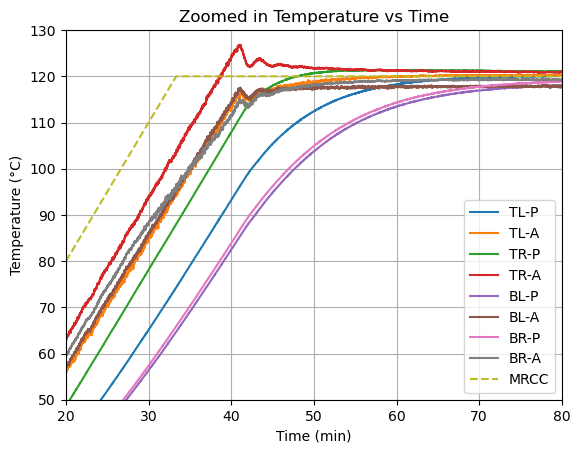

In [6]:
#Plot the data but zoom in around the beginning of the temp hold

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set axis limits using ax methods
ax.set_xlim(20, 80)
ax.set_ylim(50, 130)

# Plot each column against 'Time(s)' using matplotlib
ax.plot(df["Time(min)"], df["TL-P"], label="TL-P")
ax.plot(df["Time(min)"], df["TL-A"], label="TL-A")
ax.plot(df["Time(min)"], df["TR-P"], label="TR-P")
ax.plot(df["Time(min)"], df["TR-A"], label="TR-A")
ax.plot(df["Time(min)"], df["BL-P"], label="BL-P")
ax.plot(df["Time(min)"], df["BL-A"], label="BL-A")
ax.plot(df["Time(min)"], df["BR-P"], label="BR-P")
ax.plot(df["Time(min)"], df["BR-A"], label="BR-A")
ax.plot(df["Time(min)"], df["MRCC"], label="MRCC", linestyle="--")  # Dashed line for MRCC

# Add labels and title
ax.set_title("Zoomed in Temperature vs Time")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Temperature (°C)")
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

#### 4. Identify the max exotherm

The max exotherm is the difference between the peak measured temperature and the MRCC. Start by identifying the maximum value in each column of the data then find the location of that data so the value of the MRCC can be subtracted to find the delta.

Note: an approach similar to that shown for analyzing could also be used to find the exotherm.

In [7]:
max_values = df.max()

print(max_values)

# One can observe the max temp value below

Time(s)      17119.500000
TL-P           120.450350
TL-A           120.584798
TR-P           121.382497
TR-A           126.826364
BL-P           118.903858
BL-A           118.441251
BR-P           119.620463
BR-A           119.596754
Time(min)      285.325000
MRCC           120.000000
dtype: float64


In [8]:
# Find the maximum value in column 'TR-A' as well as the index/location in the data set that this occurs
max_temp = df["TR-A"].max()
max_temp_index = df["TR-A"].idxmax()

# Find the temperature in the MRCC at this max temp
MRCC_value = df.loc[max_temp_index, "MRCC"]

# Find the exotherm (delta)

exotherm = max_temp - MRCC_value

print("The exotherm temperature is", round(exotherm, 2), "degC")

The exotherm temperature is 6.83 degC


#### 5. Identify the lag

Lag is the maximum difference between the measured temperature and the MRCC. By observing the plot we can see that this occurs when the MRCC reaches $120^oC$. To find the lag we want to find the difference in the lowest temperature and MRCC at that time. 


In [10]:
# Define the range of rows (times) that will be considered to exclude outliers/anomolies
start_row = 2000
end_row = 5000
df_range = df.iloc[start_row:end_row + 1].copy()  # Create a copy of the slice

# Exclude specific columns from the comparison
exclude_columns = ["MRCC", "Time(s)", "Time(min)"]
columns_to_compare = df.columns.difference(exclude_columns)

# Calculate absolute differences and find the largest difference for each row in the range
df_range.loc[:, "Largest_Difference"] = (
    df_range[columns_to_compare].sub(df_range["MRCC"], axis=0).abs().max(axis=1)
)

# Identify the column with the largest difference in the range
df_range.loc[:, "Column_With_Largest_Diff"] = (
    df_range[columns_to_compare].sub(df_range["MRCC"], axis=0).abs().idxmax(axis=1)
)


# Find the larges vale of lag
lag = df_range["Largest_Difference"].max()

# Find the index of the largest lag value
lag_index = df_range["Largest_Difference"].idxmax()


# Find the location/channel and time that this lag occurs 
lag_location = df_range.loc[lag_index, 'Column_With_Largest_Diff']
lag_occurs = df_range.loc[lag_index, 'Time(min)']

print("The max lag is:", round(lag, 2), "degC at", lag_location, "at", round(lag_occurs, 2), "min")

The max lag is: 55.31 degC at BL-P at 33.33 min


#### 6. Report and submit your results
Now that you have completed the analysis you can write up your lab report and submit it. If you would like to include the code you used for your calculations then you can include them in the appendix. 